# Programming Exercise 6:Support Vector Machines
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np
from sklearn import svm #SVM software
import random #select random samples from X
import scipy.io #Used to load the OCTAVE *.mat files
from PIL import Image #display image from matrix '''sudo pip install pillow'''
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit as sigmod #Vectorized sigmoid function
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## 1 Support Vector Machines
In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.

### 1.1 Example Dataset 1

In [5]:
datafile = 'ex6/ex6data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
print('X shape = %s, y shape = %s'%(X.shape,y.shape,))

X shape = (51, 2), y shape = (51, 1)


In [6]:
#positive and negative X examples
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1 ])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0 ])

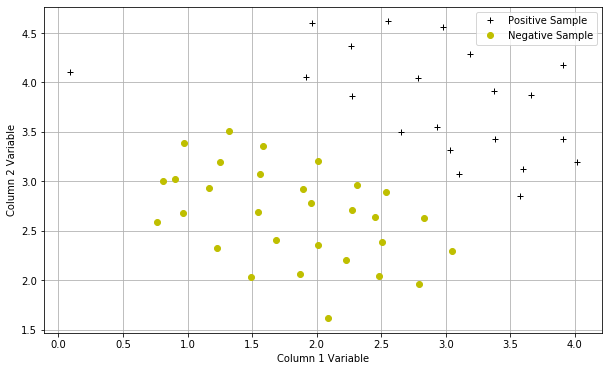

In [7]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid('--')

plotData()

In [8]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.arange(xmin,xmax,0.01)
    yvals = np.arange(ymin,ymax,0.01)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([[xvals[i],yvals[j]]])))
    zvals = zvals.transpose()

    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

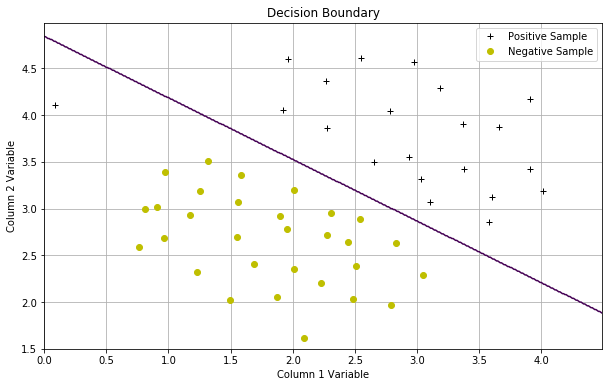

In [9]:
# Run the SVM training (with C = 1) using SVM software. 
linear_svm = svm.SVC(C=1, kernel='linear')
#Now we fit the SVM to our X matrix (no bias unit)
linear_svm.fit(X, y.flatten())
#Now we plot the decision boundary
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)

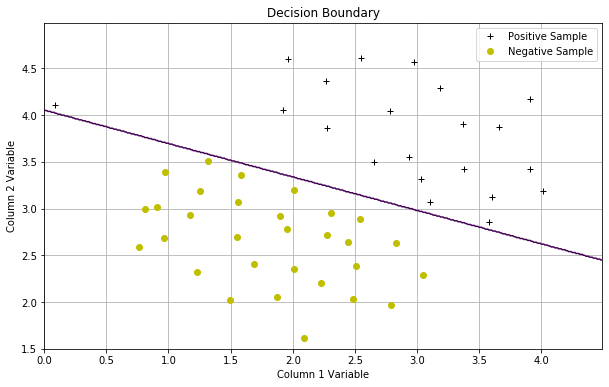

In [10]:
# Run the SVM training (with C = 100) using SVM software. 
linear_svm = svm.SVC(C=100, kernel='linear')
#Now we fit the SVM to our X matrix (no bias unit)
linear_svm.fit(X, y.flatten())
#Now we plot the decision boundary
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)

### 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

#### 1.2.1 Gaussian Kernel

In [11]:
#x is (n,1) darray
def gaussianKernel(x1,x2,sigma):
    d = -1.*np.dot((x1 - x2).T,(x1 - x2))/(2.*sigma**2)
    return np.exp(d)

In [12]:
gaussianKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.)

0.32465246735834974

#### 1.2.2 Example Dataset 2

In [13]:
datafile = 'ex6/ex6data2.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

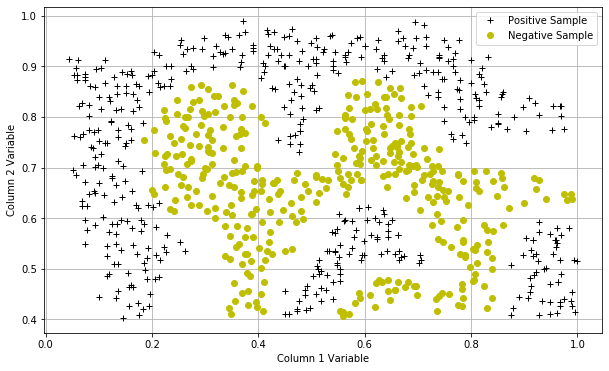

In [14]:
plotData()

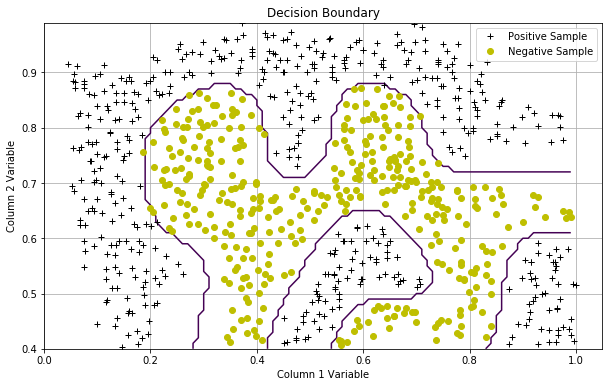

In [15]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,0,1,.4,1.0)

#### 1.2.3 Example Dataset 3

In [16]:
datafile = 'ex6/ex6data3.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

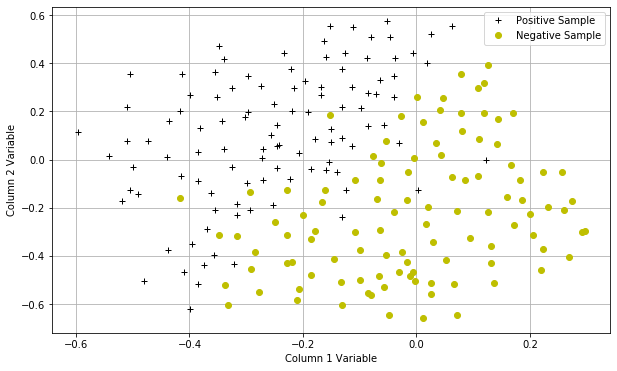

In [17]:
plotData()

In [18]:
# Your task is to use the cross validation set Xval, yval to 
# determine the best C and σ parameter to use.

# The score() function for a trained SVM takes in
# X and y to test the score on, and the (float)
# value returned is "Mean accuracy of self.predict(X) wrt. y"

Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf', gamma=gamma)
        gaus_svm.fit(X, y.flatten())
        this_score = gaus_svm.score(Xval,yval)
        #print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
            
print("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))

Best C, sigma pair is (0.300000, 0.100000) with a score of 0.965000.


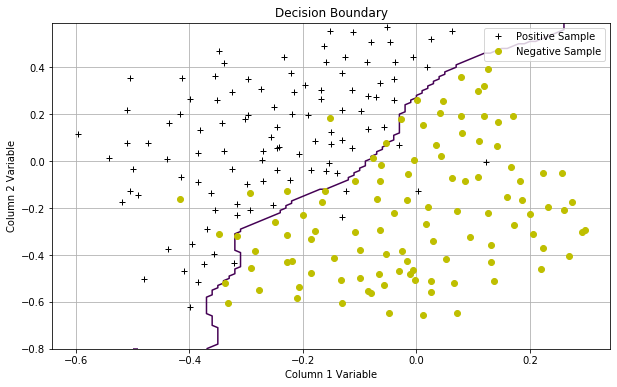

In [19]:
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma = np.power(best_pair[1],-2.))
gaus_svm.fit( X, y.flatten() )
plotData()
plotBoundary(gaus_svm,-.5,.3,-.8,.6)

## 2 Spam Classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector x ∈ Rn. The following parts of the exercise willwalk you through how such a feature vector can be constructed from an email.

### 2.1 Preprocessing Emails

In [48]:
datafile = './ex6/emailSample1.txt'
f = open(datafile)
emailContent = f.read()
emailContent

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [49]:
def preProcessEmail(contents):
    #lower case
    contents = contents.lower()
    #stip all HTML
    contents = re.sub( '<[^<>]+>',  ' ' , contents)
    #handle numbers
    contents = re.sub('[0-9]+',  'number' , contents)
    #handle urls
    contents = re.sub('(http|https)://[^\s]*',  'httpaddr', contents)
    #replace email address with 'emailaddr'
    contents = re.sub('[^\s]+@[^\s]+', 'emailaddr',contents)
    #handle $ sign
    contents = re.sub('[$]+',  'dollar', contents)
    #remove any non alphanumeric characters
    contents = re.sub('[^a-zA-Z0-9]', ' ', contents)
    #split string
    contents = contents.split(' ')
    #remove len < 1
    contents = [x for x in contents if len(x)>1]
    return contents

In [50]:
contents = preProcessEmail(emailContent)
contents[:10]

['anyone',
 'knows',
 'how',
 'much',
 'it',
 'costs',
 'to',
 'host',
 'web',
 'portal']

#### 2.1.1 Vocabulary List

In [23]:
f = open('./ex6/vocab.txt')
strs = [x for x in f.read().split('\n')]
strs = [x.split('\t') for x in strs]
strs = strs[0:1899]
words = [x[1] for x in strs]

In [24]:
words[:20] #first 20 worlds

['aa',
 'ab',
 'abil',
 'abl',
 'about',
 'abov',
 'absolut',
 'abus',
 'ac',
 'accept',
 'access',
 'accord',
 'account',
 'achiev',
 'acquir',
 'across',
 'act',
 'action',
 'activ',
 'actual']

### 2.2 Extracting Features from Emails

In [54]:
def emailFeatures(filename,words):
    f = open(filename)
    contents =  f.read()
    x = np.zeros([1,len(words)])
    for i in range(len(contents)):
        for j in range(len(words)):
            if(contents[i] == words[j]):
                x[0][j] = 1
    return x

In [59]:
x1 = emailFeatures('./ex6/spamSample1.txt', words)
x2 = emailFeatures('./ex6/spamSample2.txt', words)
x3 = emailFeatures('./ex6/emailSample1.txt', words)
x4 = emailFeatures('./ex6/emailSample2.txt', words)
X = np.zeros([4,x1.shape[1]])
X[0, :] = x1
X[1, :] = x2
X[2, :] = x3
X[3, :] = x4
X.shape

(4, 1899)

In [60]:
y = np.array([[1], [1], [0], [0]])
y.shape

(4, 1)

### 2.3 Training SVM for Spam Classification

In [75]:
linear_svm = svm.SVC(C=100, kernel='rbf')
linear_svm.fit(X, y.flatten() )

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 2.4 Top Predictors for Spam

In [78]:
X = emailFeatures('./ex6/spamSample1.txt', words)
linear_svm.predict(X)

array([1])